In [1]:
# Libraries
library(ggplot2)
library(lattice)
library(Boruta)
library(mlbench)
library(caret)
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [7]:
data("Sonar")

In [6]:
Sonar

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,⋯,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,⋯,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,⋯,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
6,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,⋯,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
7,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,⋯,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
8,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,⋯,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
9,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,⋯,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R


In [10]:
# Feature Selection
set.seed(123)
boruta_f <- Boruta(Class ~ ., data = Sonar, doTrace = 2, maxRuns = 500)

 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

 11. run of importance source...

 12. run of importance source...

 13. run of importance source...

After 13 iterations, +0.6 secs: 

 confirmed 20 attributes: V10, V11, V12, V13, V15 and 15 more;

 rejected 7 attributes: V38, V41, V53, V56, V57 and 2 more;

 still have 33 attributes left.


 14. run of importance source...

 15. run of importance source...

 16. run of importance source...

 17. run of importance source...

After 17 iterations, +0.82 secs: 

 confirmed 2 attributes: V16, V51;

 rejected 1 attribute: V58;

 still have 30 attributes left.


 18. run of importance source...

 19. run of importance source...

 20. run of importance source...

 2

In [11]:
print(boruta_f)

Boruta performed 499 iterations in 21.59683 secs.
 33 attributes confirmed important: V1, V10, V11, V12, V13 and 28 more;
 20 attributes confirmed unimportant: V14, V24, V25, V3, V33 and 15
more;
 7 tentative attributes left: V2, V29, V30, V32, V39 and 2 more;


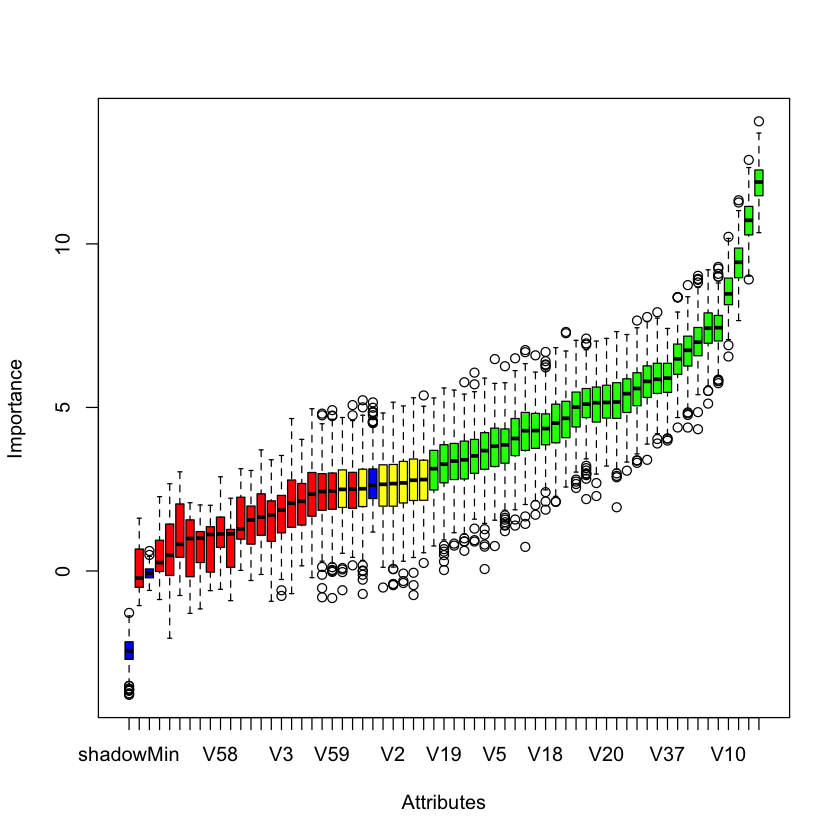

In [12]:
plot(boruta_f)